In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("end-use-demand-2023.csv")

df

,Unnamed: 0,Scenario,Region,Variable,Year,Value,Sector
0,1,Current Measures,Alberta,Biofuels & Emerging Energy,2005,0.0000,Commercial
1,2,Current Measures,Alberta,Biofuels & Emerging Energy,2005,107.8407,Industrial
2,3,Current Measures,Alberta,Biofuels & Emerging Energy,2005,4.6001,Residential
3,4,Current Measures,Alberta,Electricity,2005,45.7268,Commercial
4,5,Current Measures,Alberta,Electricity,2005,137.6016,Industrial
...,...,...,...,...,...,...,...
75343,75344,Global Net-zero,Yukon,Natural Gas,2022,0.0000,Transportation
75344,75345,Global Net-zero,Yukon,Total End-Use,2021,4.5589,Transportation
75345,75346,Global Net-zero,Yukon,Total End-Use,2022,5.0427,Transportation
75346,75347,Global Net-zero,Yukon,Total End-Use,2021,10.6630,Total End-Use


In [37]:
df = df.drop(columns=['Unnamed: 0'])
df

,Scenario,Region,Variable,Year,Value,Sector
0,Current Measures,Alberta,Biofuels & Emerging Energy,2005,0.0000,Commercial
1,Current Measures,Alberta,Biofuels & Emerging Energy,2005,107.8407,Industrial
2,Current Measures,Alberta,Biofuels & Emerging Energy,2005,4.6001,Residential
3,Current Measures,Alberta,Electricity,2005,45.7268,Commercial
4,Current Measures,Alberta,Electricity,2005,137.6016,Industrial
...,...,...,...,...,...,...
75343,Global Net-zero,Yukon,Natural Gas,2022,0.0000,Transportation
75344,Global Net-zero,Yukon,Total End-Use,2021,4.5589,Transportation
75345,Global Net-zero,Yukon,Total End-Use,2022,5.0427,Transportation
75346,Global Net-zero,Yukon,Total End-Use,2021,10.6630,Total End-Use


In [38]:
df.isna().sum()

Scenario    0
Region      0
Variable    0
Year        0
Value       0
Sector      0
dtype: int64

In [39]:
region = df['Region'].unique()
print(region)

df_region = {}
for types in region:
    # Seleccionar las filas que tienen el types actual
    df_types = df[df['Region'] == types].copy()  # Usar copy para evitar la vista
    # Agregar el DataFrame al diccionario con el types como clave
    df_region[types] = df_types.reset_index(drop=True)


['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories' 'Nova Scotia'
 'Nunavut' 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan'
 'Yukon' 'Canada']


In [40]:
for k, v in df_region.items():
    print(f"DataFrame para tipo '{k}':")

DataFrame para tipo 'Alberta':
DataFrame para tipo 'British Columbia':
DataFrame para tipo 'Manitoba':
DataFrame para tipo 'New Brunswick':
DataFrame para tipo 'Newfoundland and Labrador':
DataFrame para tipo 'Northwest Territories':
DataFrame para tipo 'Nova Scotia':
DataFrame para tipo 'Nunavut':
DataFrame para tipo 'Ontario':
DataFrame para tipo 'Prince Edward Island':
DataFrame para tipo 'Quebec':
DataFrame para tipo 'Saskatchewan':
DataFrame para tipo 'Yukon':
DataFrame para tipo 'Canada':


In [41]:
for k, v in df_region.items():
    print(f"DataFrame para tipo '{k}':")
    print(v)

DataFrame para tipo 'Alberta':
              Scenario   Region                    Variable  Year     Value  \
0     Current Measures  Alberta  Biofuels & Emerging Energy  2005    0.0000   
1     Current Measures  Alberta  Biofuels & Emerging Energy  2005  107.8407   
2     Current Measures  Alberta  Biofuels & Emerging Energy  2005    4.6001   
3     Current Measures  Alberta                 Electricity  2005   45.7268   
4     Current Measures  Alberta                 Electricity  2005  137.6016   
...                ...      ...                         ...   ...       ...   
5377   Global Net-zero  Alberta              Motor Gasoline  2022  195.8688   
5378   Global Net-zero  Alberta                 Natural Gas  2021    1.4009   
5379   Global Net-zero  Alberta                 Natural Gas  2022    1.4398   
5380   Global Net-zero  Alberta               Total End-Use  2021  411.4120   
5381   Global Net-zero  Alberta               Total End-Use  2022  449.9235   

              Sector

In [42]:
for k, v in df_region.items():
    v = v.loc[v['Variable'] == 'Electricity']
    v = v.loc[v['Scenario'] == 'Current Measures']
    v = v.loc[v['Sector'] != 'Transportation']
    v = v.loc[v['Sector'] != 'Total End-Use']
    df_region[k] = v.reset_index(drop=True)
    print(f"DataFrame para tipo '{k}':")
    print(v)

DataFrame para tipo 'Alberta':
             Scenario   Region     Variable  Year     Value       Sector
3    Current Measures  Alberta  Electricity  2005   45.7268   Commercial
4    Current Measures  Alberta  Electricity  2005  137.6016   Industrial
5    Current Measures  Alberta  Electricity  2005   27.9687  Residential
21   Current Measures  Alberta  Electricity  2006   48.3445   Commercial
22   Current Measures  Alberta  Electricity  2006  144.2703   Industrial
..                ...      ...          ...   ...       ...          ...
945  Current Measures  Alberta  Electricity  2049  248.8975   Industrial
946  Current Measures  Alberta  Electricity  2049   63.1458  Residential
962  Current Measures  Alberta  Electricity  2050   93.6245   Commercial
963  Current Measures  Alberta  Electricity  2050  249.9045   Industrial
964  Current Measures  Alberta  Electricity  2050   63.8786  Residential

[138 rows x 6 columns]
DataFrame para tipo 'British Columbia':
              Scenario       

In [43]:
import os
for k, v in df_region.items():
    df_region[k] = v.reset_index(drop=True)
    v.to_csv(os.path.join("demanda/", f"Demand_Electricity_{k}.csv"))

In [44]:
for k, v in df_region.items():
    df_region[k] = v.drop(v[v['Year'] > 2023].index)
    print(df_region[k])
    print(v)

            Scenario   Region     Variable  Year     Value       Sector
0   Current Measures  Alberta  Electricity  2005   45.7268   Commercial
1   Current Measures  Alberta  Electricity  2005  137.6016   Industrial
2   Current Measures  Alberta  Electricity  2005   27.9687  Residential
3   Current Measures  Alberta  Electricity  2006   48.3445   Commercial
4   Current Measures  Alberta  Electricity  2006  144.2703   Industrial
5   Current Measures  Alberta  Electricity  2006   29.6352  Residential
6   Current Measures  Alberta  Electricity  2007   48.8933   Commercial
7   Current Measures  Alberta  Electricity  2007  142.3708   Industrial
8   Current Measures  Alberta  Electricity  2007   30.8091  Residential
9   Current Measures  Alberta  Electricity  2008   49.9452   Commercial
10  Current Measures  Alberta  Electricity  2008  142.7757   Industrial
11  Current Measures  Alberta  Electricity  2008   31.7981  Residential
12  Current Measures  Alberta  Electricity  2009   50.2679   Com

In [45]:
for k, v in df_region.items():
    v = v.sort_values(by='Year')
    df_region[k] = v.reset_index(drop=True)
    print(v)

            Scenario   Region     Variable  Year     Value       Sector
0   Current Measures  Alberta  Electricity  2005   45.7268   Commercial
1   Current Measures  Alberta  Electricity  2005  137.6016   Industrial
2   Current Measures  Alberta  Electricity  2005   27.9687  Residential
3   Current Measures  Alberta  Electricity  2006   48.3445   Commercial
4   Current Measures  Alberta  Electricity  2006  144.2703   Industrial
5   Current Measures  Alberta  Electricity  2006   29.6352  Residential
6   Current Measures  Alberta  Electricity  2007   48.8933   Commercial
7   Current Measures  Alberta  Electricity  2007  142.3708   Industrial
8   Current Measures  Alberta  Electricity  2007   30.8091  Residential
9   Current Measures  Alberta  Electricity  2008   49.9452   Commercial
10  Current Measures  Alberta  Electricity  2008  142.7757   Industrial
11  Current Measures  Alberta  Electricity  2008   31.7981  Residential
14  Current Measures  Alberta  Electricity  2009   32.7248  Resi

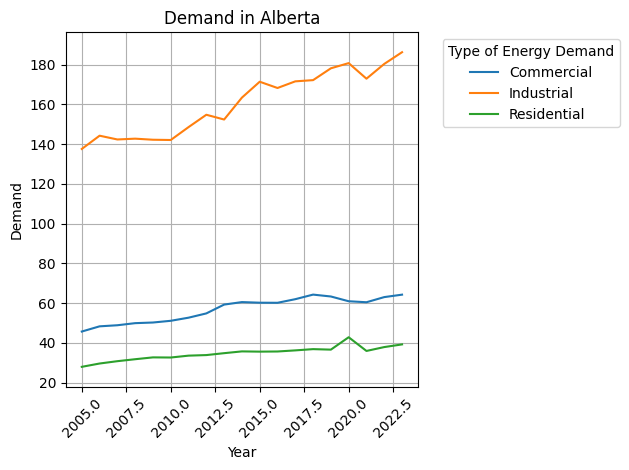

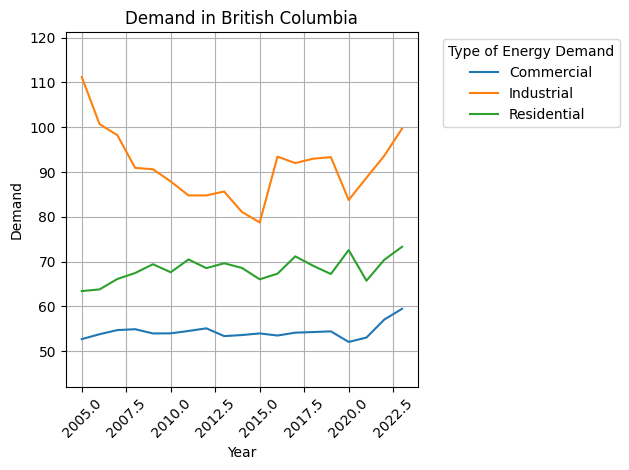

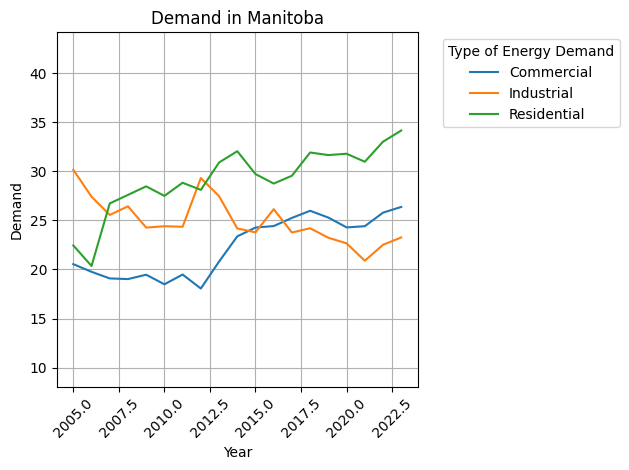

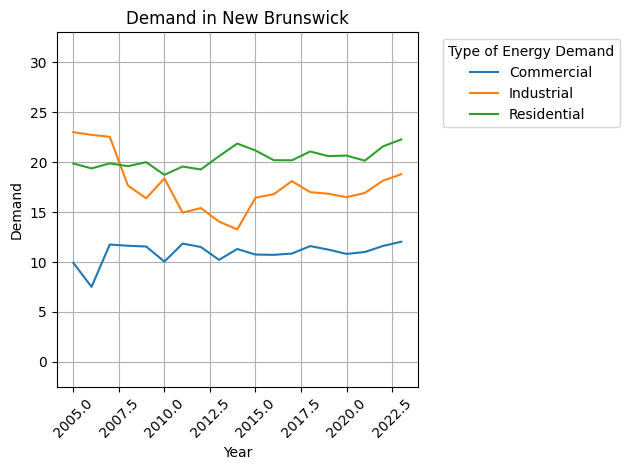

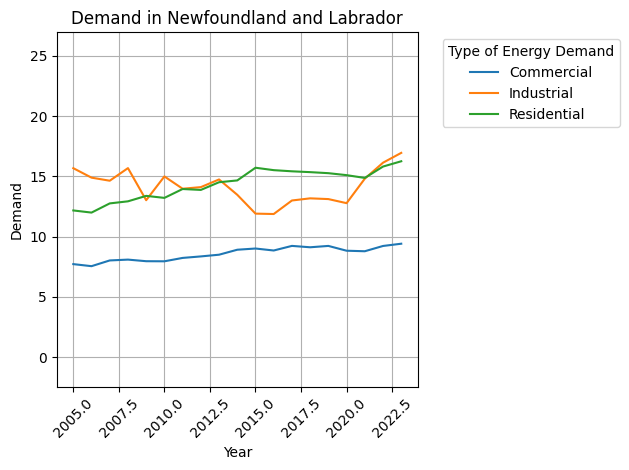

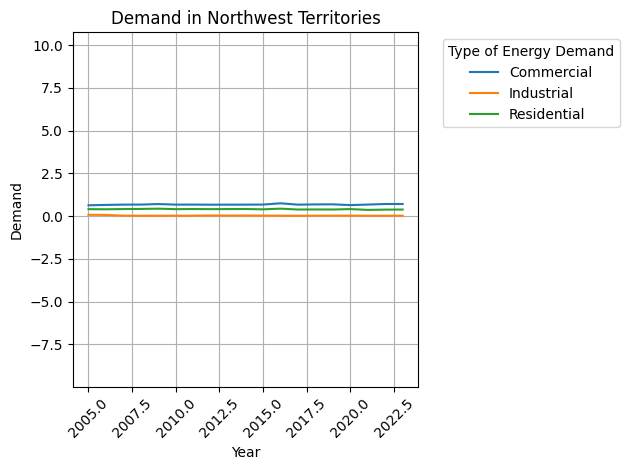

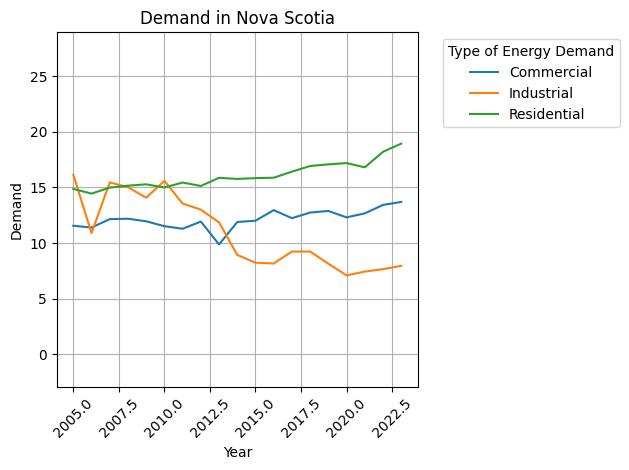

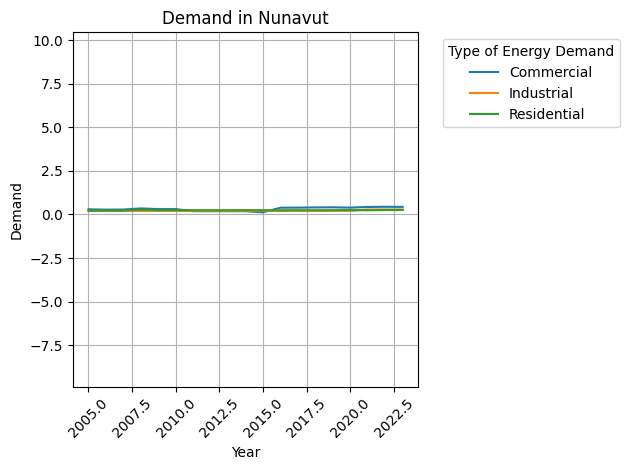

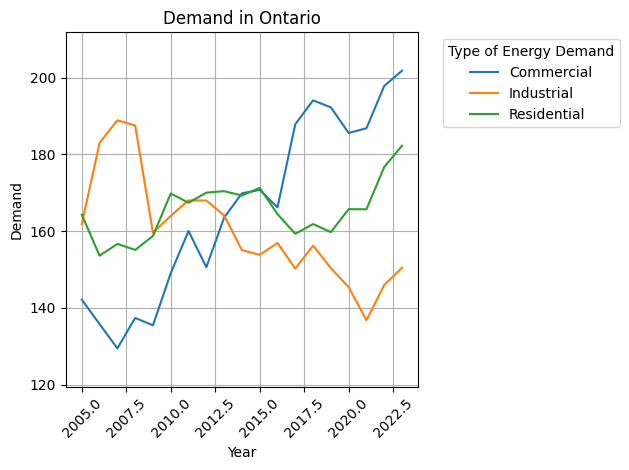

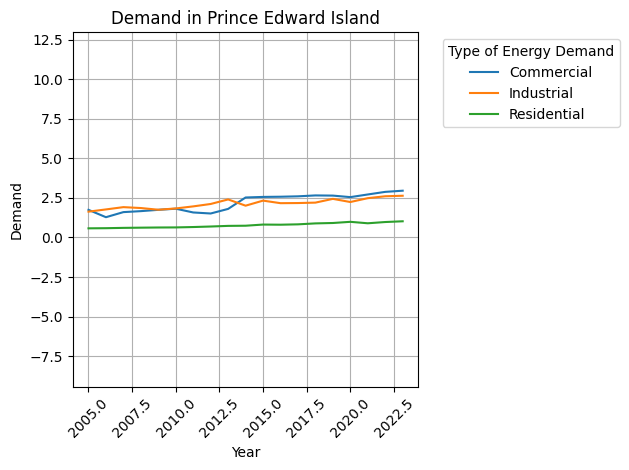

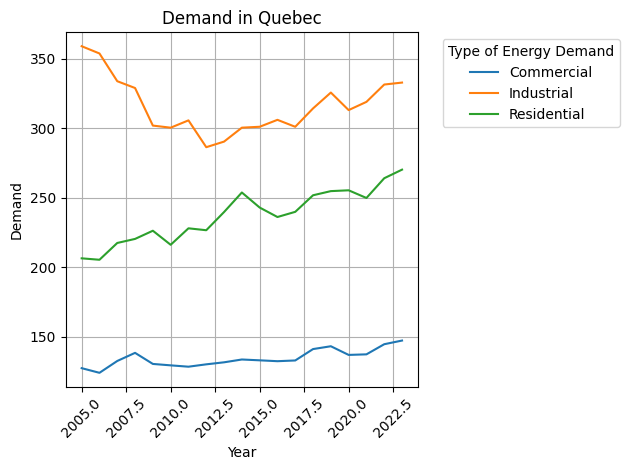

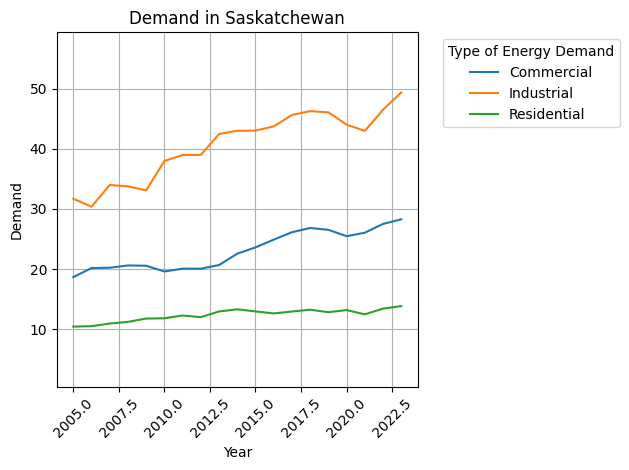

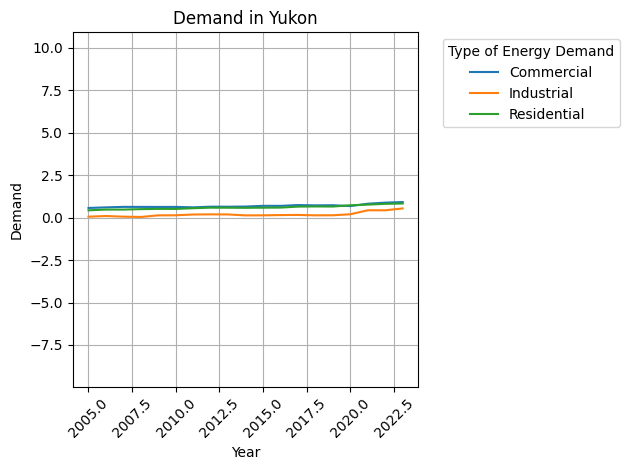

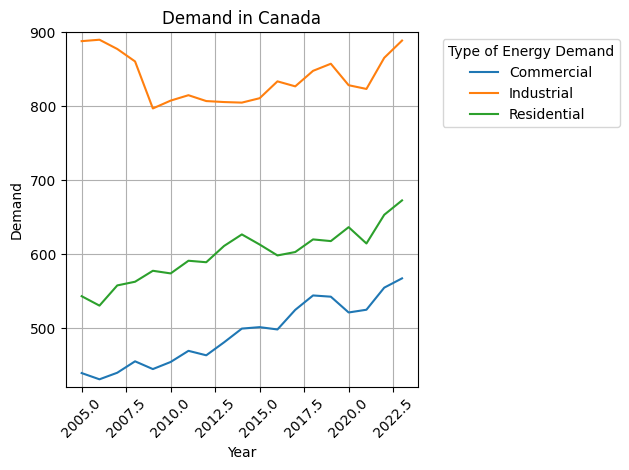

In [46]:
for k, v in df_region.items():
    fig, ax = plt.subplots()
    for sector in v['Sector'].unique():
        data_sector = v[v['Sector'] == sector]
        ax.plot(data_sector['Year'], data_sector['Value'], label=sector)
        
        plt.title(f'Demand in {k}')
        plt.xlabel('Year')
        plt.ylabel('Demand')
        plt.xticks( rotation=45)
        plt.grid(True)
        plt.ylim(min(v['Value']) - 10, max(v['Value']) + 10)
        # Show the plot
        plt.legend(title='Type of Energy Demand', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join("demanda/", f"Demand in {k}"), bbox_inches = "tight", dpi=300)